In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/home/hasan/DATA SET/EDA/rainfall-in-india/rainfall in india 1901-2015.csv')

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


# Data Analysis

Text(0.5, 1.0, 'Annual rail fall from 1901 to 2015')

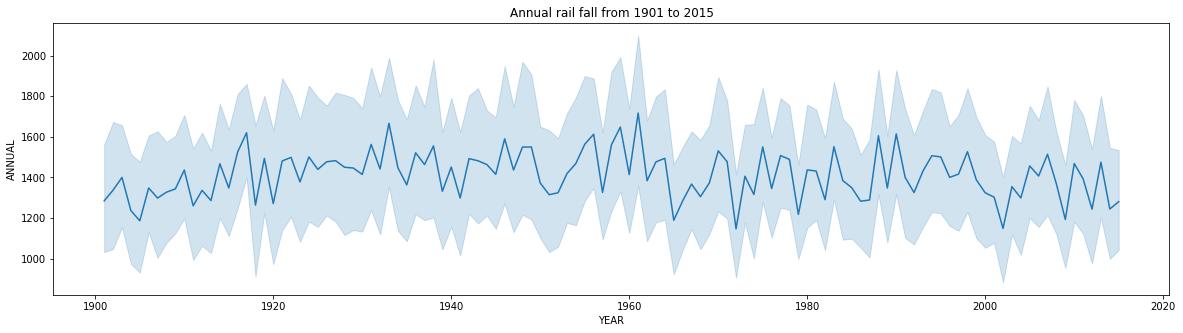

In [4]:
#annual railfall graph
plt.figure(figsize=(20,5))
sns.lineplot(x=data['YEAR'], y=data['ANNUAL'])
plt.title('Annual rail fall from 1901 to 2015')

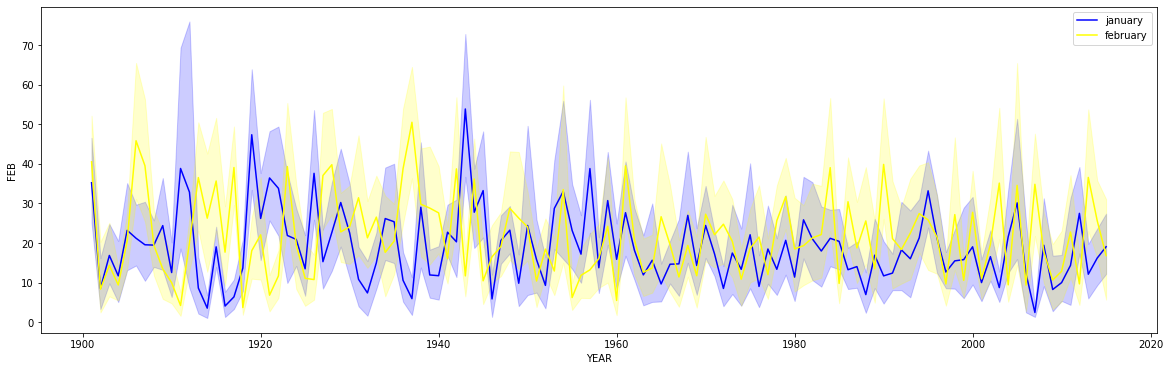

In [5]:
#railfall of January and  in every year
plt.figure(figsize=(20,6))
sns.lineplot(x=data['YEAR'], y=data['JAN'], label='january', color='blue')
sns.lineplot(x=data['YEAR'], y=data['FEB'], label='february', color='yellow')
plt.legend(loc='best')

Text(0.5, 1.0, 'Rainfall of From January to February')

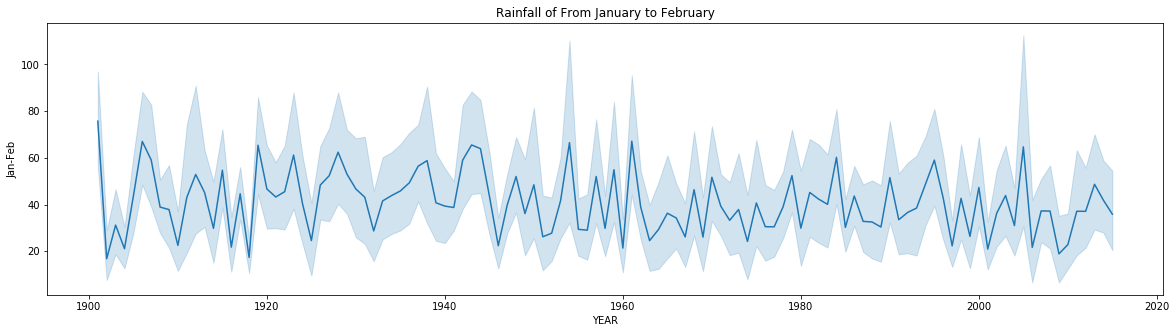

In [6]:
#rainfall of january and february
plt.figure(figsize=(20,5))
sns.lineplot(x=data['YEAR'], y=data['Jan-Feb'])
plt.title('Rainfall of From January to February')

In [7]:
#total rainfall in every month
data_df = data.copy()
sub_data = data_df.drop(['SUBDIVISION','YEAR','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'], axis=1)
sub_data.sum()

JAN      77952.5
FEB      89685.3
MAR     112446.3
APR     177340.0
MAY     352670.9
JUN     946493.8
JUL    1426703.7
AUG    1193563.5
SEP     811157.5
OCT     392438.3
NOV     163650.6
DEC      77482.6
dtype: float64

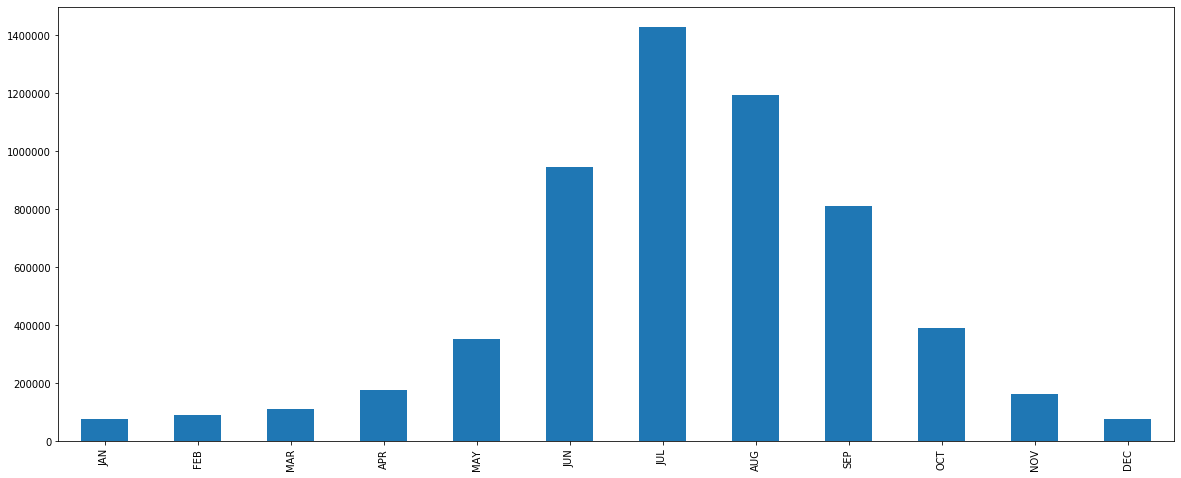

In [8]:
plt.figure(figsize=(20,8))
sub_data.sum().plot(kind='bar')

In [9]:
#total rainfall in 'Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'
data_df = data.copy()
sub_data = data_df.drop(['SUBDIVISION','YEAR','ANNUAL','YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], axis=1)
sub_data.sum()

Jan-Feb     167473.4
Mar-May     640288.5
Jun-Sep    4371759.9
Oct-Dec     632274.3
dtype: float64

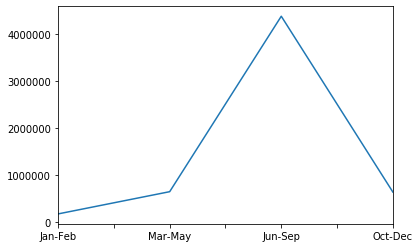

In [10]:
sub_data.sum().plot()

In [11]:
data['SUBDIVISION'].value_counts()

BIHAR                                 115
JAMMU & KASHMIR                       115
HARYANA DELHI & CHANDIGARH            115
COASTAL KARNATAKA                     115
GUJARAT REGION                        115
COASTAL ANDHRA PRADESH                115
NORTH INTERIOR KARNATAKA              115
GANGETIC WEST BENGAL                  115
CHHATTISGARH                          115
SOUTH INTERIOR KARNATAKA              115
MADHYA MAHARASHTRA                    115
MATATHWADA                            115
SAURASHTRA & KUTCH                    115
NAGA MANI MIZO TRIPURA                115
WEST UTTAR PRADESH                    115
ORISSA                                115
SUB HIMALAYAN WEST BENGAL & SIKKIM    115
KONKAN & GOA                          115
EAST MADHYA PRADESH                   115
EAST UTTAR PRADESH                    115
ASSAM & MEGHALAYA                     115
RAYALSEEMA                            115
WEST RAJASTHAN                        115
PUNJAB                            

In [12]:
tr_rainfall_division = data.groupby('SUBDIVISION')['ANNUAL'].agg('sum')
tr_rainfall_division

SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             304453.7
ARUNACHAL PRADESH                     311116.0
ASSAM & MEGHALAYA                     296780.0
BIHAR                                 137727.9
CHHATTISGARH                          157748.8
COASTAL ANDHRA PRADESH                121084.0
COASTAL KARNATAKA                     388558.7
EAST MADHYA PRADESH                   138575.0
EAST RAJASTHAN                         75349.8
EAST UTTAR PRADESH                    112609.5
GANGETIC WEST BENGAL                  171406.1
GUJARAT REGION                        105596.5
HARYANA DELHI & CHANDIGARH             61007.1
HIMACHAL PRADESH                      144939.7
JAMMU & KASHMIR                       129924.0
JHARKHAND                             150569.9
KERALA                                336431.1
KONKAN & GOA                          342433.9
LAKSHADWEEP                           163861.3
MADHYA MAHARASHTRA                    101226.8
MATATHWADA                             90929.6
N

In [13]:
#8 most rainfall state
most_rainfall_state = tr_rainfall_division.sort_values(ascending=False)
most_rainfall_state.head(8)

SUBDIVISION
COASTAL KARNATAKA                     388558.7
KONKAN & GOA                          342433.9
KERALA                                336431.1
SUB HIMALAYAN WEST BENGAL & SIKKIM    316505.0
ARUNACHAL PRADESH                     311116.0
ANDAMAN & NICOBAR ISLANDS             304453.7
ASSAM & MEGHALAYA                     296780.0
NAGA MANI MIZO TRIPURA                279866.2
Name: ANNUAL, dtype: float64

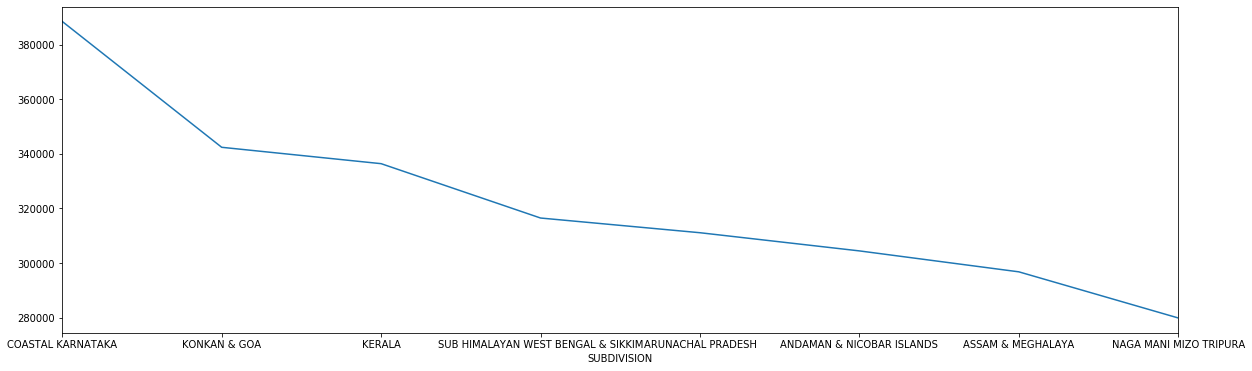

In [14]:
plt.figure(figsize=(20,6))
most_rainfall_state.head(8).plot()

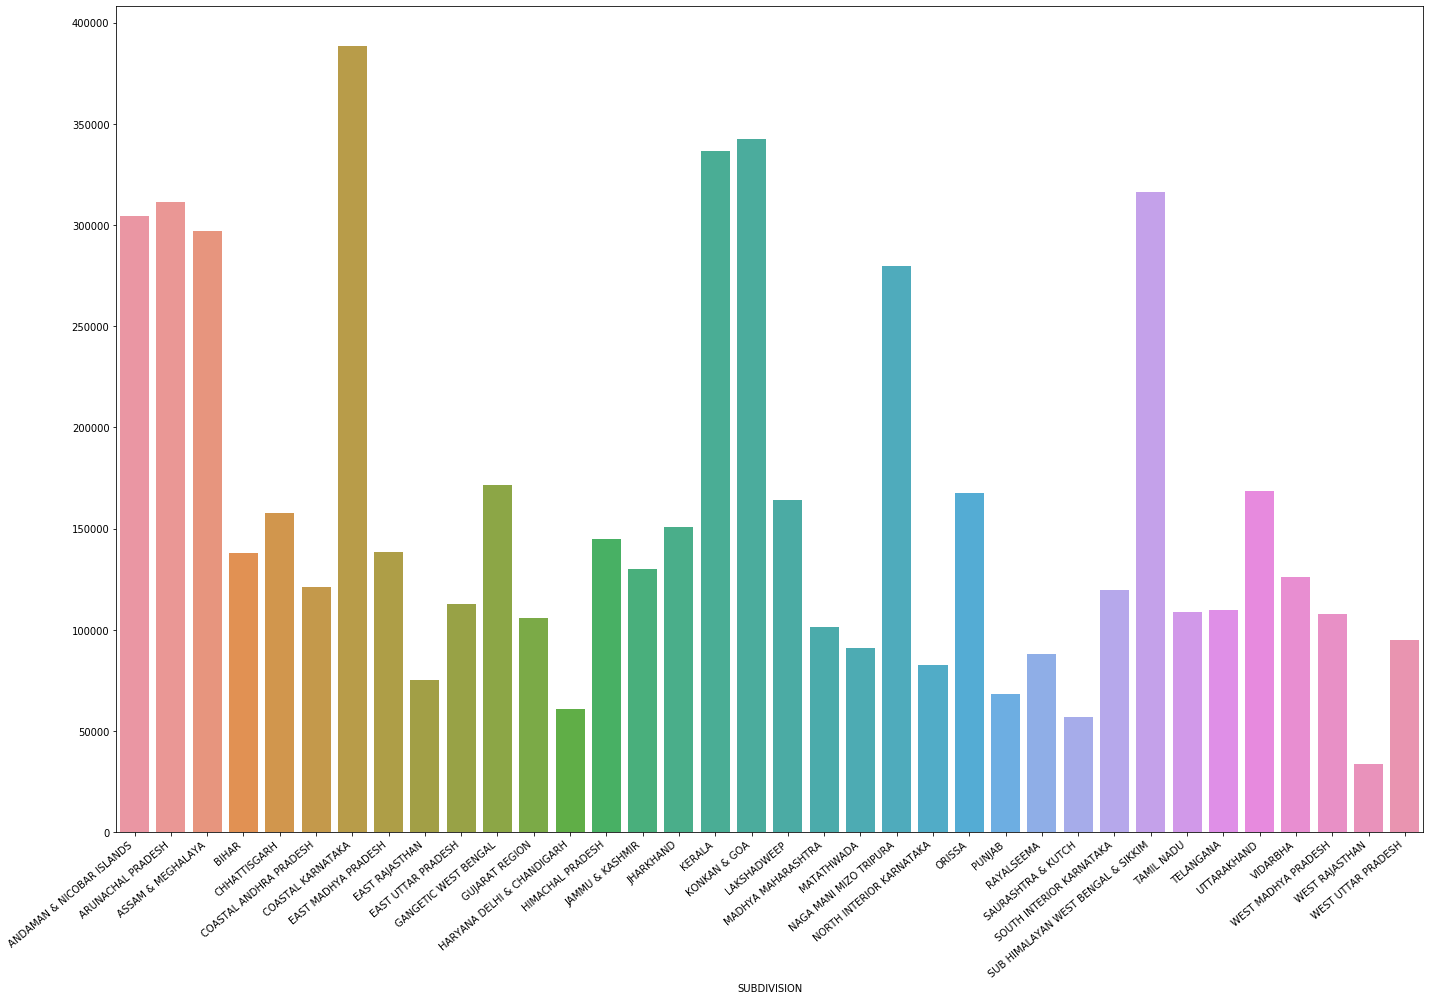

In [15]:
#graph of total rainfall in every state
plt.figure(figsize=(20,14))
tot = sns.barplot(x=tr_rainfall_division.index, y=tr_rainfall_division.values)
tot.set_xticklabels(tot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [16]:
#10 annual rainfall state
most_rain_state = data.sort_values('ANNUAL', ascending=False)
most_rain_state = most_rain_state.loc[:,['SUBDIVISION','ANNUAL','YEAR']]
most_rain_state.head(10)

,SUBDIVISION,ANNUAL,YEAR
142,ARUNACHAL PRADESH,6331.1,1948
132,ARUNACHAL PRADESH,6129.0,1938
115,ARUNACHAL PRADESH,5691.4,1921
3602,COASTAL KARNATAKA,5553.9,1961
112,ARUNACHAL PRADESH,5486.3,1918
122,ARUNACHAL PRADESH,5272.7,1928
121,ARUNACHAL PRADESH,5253.2,1927
149,ARUNACHAL PRADESH,5063.5,1958
155,ARUNACHAL PRADESH,4959.3,1964
143,ARUNACHAL PRADESH,4874.7,1949


In [17]:
#maximum rainfall in every state
most_rain_state.groupby('SUBDIVISION')['ANNUAL'].agg(['max','min']).sort_values('max', ascending=False)

,max,min
SUBDIVISION,,
ARUNACHAL PRADESH,6331.1,1668.5
COASTAL KARNATAKA,5553.9,2510.9
NAGA MANI MIZO TRIPURA,4316.2,1353.8
KERALA,4257.8,2068.8
KONKAN & GOA,4000.2,1682.8
ANDAMAN & NICOBAR ISLANDS,3938.2,1849.4
SUB HIMALAYAN WEST BENGAL & SIKKIM,3655.1,1988.2
ASSAM & MEGHALAYA,3403.5,1743.4
LAKSHADWEEP,2361.6,992.6


In [18]:
#mean rainfall in every state
most_rain_state.groupby('SUBDIVISION')['ANNUAL'].agg(['mean']).sort_values('mean', ascending=False)

,mean
SUBDIVISION,
ARUNACHAL PRADESH,3418.857143
COASTAL KARNATAKA,3408.409649
KONKAN & GOA,2977.686087
ANDAMAN & NICOBAR ISLANDS,2927.439423
KERALA,2925.487826
SUB HIMALAYAN WEST BENGAL & SIKKIM,2752.217391
ASSAM & MEGHALAYA,2580.695652
NAGA MANI MIZO TRIPURA,2433.619130
LAKSHADWEEP,1590.886408


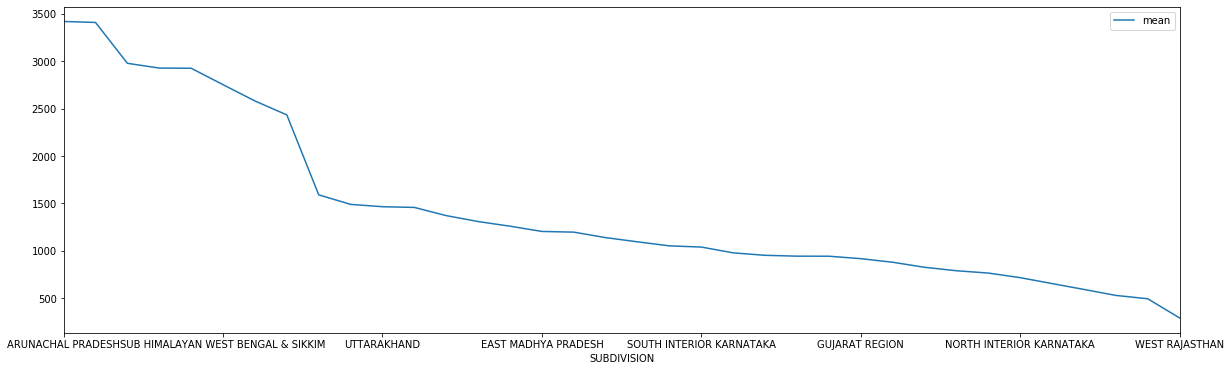

In [19]:
most_rain_state.groupby('SUBDIVISION')['ANNUAL'].agg(['mean']).sort_values('mean', ascending=False).plot(figsize=(20,6))

In [20]:
#rainfall of BIHAR in 1977 in june month
filter_data = data.loc[:,['SUBDIVISION','YEAR','JUN']]
bihar = filter_data[filter_data['SUBDIVISION']=='BIHAR']
bihar[bihar['YEAR']==1977]

,SUBDIVISION,YEAR,JUN
973,BIHAR,1977,102.5


### Analysing only with TELANGANA

In [21]:
telengana = data[data['SUBDIVISION']=='TELANGANA']
telengana

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3197,TELANGANA,1901,6.9,41.8,7.8,45.2,22.0,123.6,237.8,177.2,77.7,75.5,12.2,0.0,827.7,48.7,75.0,616.4,87.7
3198,TELANGANA,1902,0.0,0.0,0.2,10.7,7.3,52.4,146.3,142.8,190.5,41.7,31.2,7.3,630.4,0.0,18.2,532.0,80.2
3199,TELANGANA,1903,12.9,4.6,0.0,9.9,40.7,99.2,505.2,246.7,191.9,155.8,15.5,1.1,1283.4,17.5,50.5,1042.9,172.4
3200,TELANGANA,1904,0.0,0.0,10.8,0.8,14.7,104.2,139.5,50.0,162.3,44.4,0.0,0.0,526.7,0.0,26.3,456.0,44.4
3201,TELANGANA,1905,0.0,4.3,12.8,27.6,32.2,129.5,82.4,237.3,179.1,19.6,0.0,0.0,724.9,4.3,72.6,628.4,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,TELANGANA,2011,0.0,11.9,2.6,25.6,9.3,83.9,268.2,225.9,107.6,13.9,4.2,0.0,753.1,11.9,37.4,685.6,18.1
3308,TELANGANA,2012,6.7,0.0,0.2,14.0,8.4,124.4,300.3,229.9,202.4,83.6,38.7,0.0,1008.6,6.7,22.6,857.0,122.3
3309,TELANGANA,2013,2.4,29.0,0.2,24.4,8.5,213.4,453.8,230.6,161.4,205.9,16.4,2.7,1348.7,31.4,33.0,1059.2,225.0
3310,TELANGANA,2014,0.2,2.9,58.3,10.3,73.3,62.3,146.0,205.2,146.8,29.6,10.8,0.7,746.4,3.1,141.9,560.2,41.0


In [22]:
#total rainfall in telengana form 1901 to 2015
telengana['ANNUAL'].sum()

109638.5

In [23]:
#total rainfall from Jan-Feb, Mar-May, Jun-Sep, Oct-Dec
tel_filt = telengana.loc[:,['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']]
tel_filt.sum()

Jan-Feb     2000.6
Mar-May     6459.9
Jun-Sep    89721.5
Oct-Dec    11456.4
dtype: float64

Text(0, 0.5, 'total rainfall')

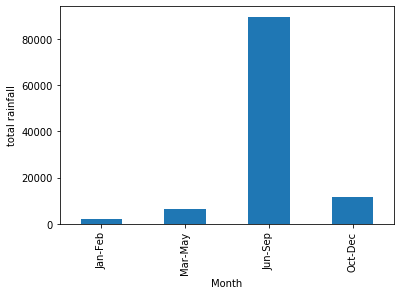

In [24]:
tel_filt.sum().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('total rainfall')

In [25]:
#annual rain of telengana in 1990
filter_tel = telengana.loc[:,['YEAR','ANNUAL']]
filter_tel[filter_tel['YEAR']==1990]

,YEAR,ANNUAL
3286,1990,1425.7


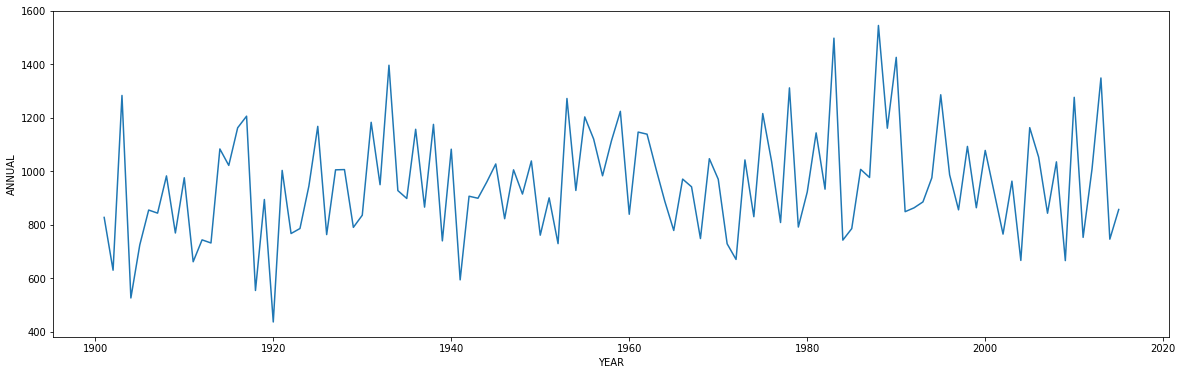

In [26]:
plt.figure(figsize=(20,6))
sns.lineplot(x=telengana['YEAR'], y=telengana['ANNUAL'])

In [27]:
#total rainfall in every month in telengana
telengana_df = telengana.copy()
sub_telengana = telengana_df.drop(['SUBDIVISION','YEAR','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'], axis=1)
sub_telengana.sum()

JAN      885.8
FEB     1114.2
MAR     1450.7
APR     2091.3
MAY     2918.0
JUN    16344.5
JUL    28462.4
AUG    24731.8
SEP    20182.9
OCT     8536.1
NOV     2328.8
DEC      591.3
dtype: float64

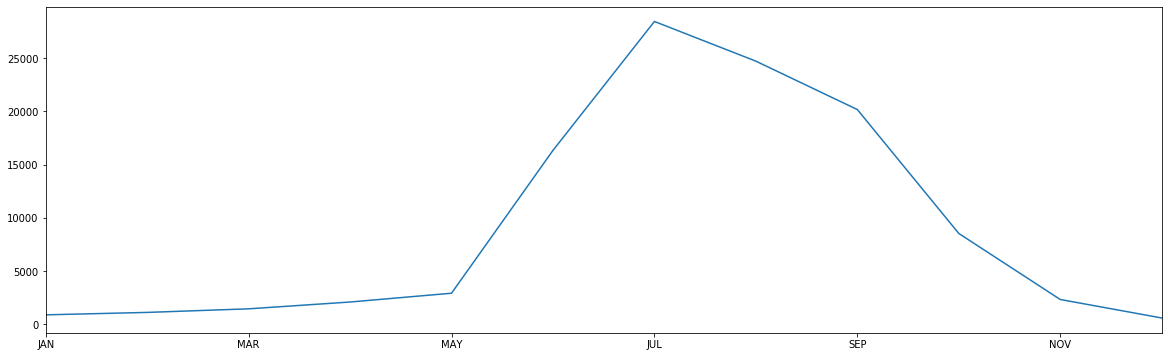

In [28]:
plt.figure(figsize=(20,6))
sub_telengana.sum().plot()

In [29]:
#10 most rainfall year of telengana
most_rainfall_year = telengana.loc[:,['YEAR','ANNUAL']]
most_rainfall_year.sort_values('ANNUAL', ascending=False).head(10)

,YEAR,ANNUAL
3284,1988,1544.9
3279,1983,1497.5
3286,1990,1425.7
3229,1933,1396.3
3309,2013,1348.7
3274,1978,1311.7
3291,1995,1286.0
3199,1903,1283.4
3306,2010,1276.4
3249,1953,1272.1


In [30]:
#5 most rainfall year in January
telengana.loc[:,['YEAR','JAN']].sort_values('JAN', ascending=False).head()

,YEAR,JAN
3291,1995,98.7
3218,1922,55.3
3222,1926,46.1
3301,2005,43.4
3220,1924,37.0


In [31]:
#5 most rainfall year from june to september
telengana.loc[:,['YEAR','Jun-Sep']].sort_values('Jun-Sep', ascending=False).head()

,YEAR,Jun-Sep
3284,1988,1447.2
3279,1983,1255.4
3274,1978,1130.8
3255,1959,1128.0
3285,1989,1087.6
